Análise do COVID usando regressão linear, exponencial e modelo sigmóide.

In [29]:
using CSV, DataFrames, Plots
gr()
plot(rand(3), rand(3))
nothing

ArgumentError: ArgumentError: Package XLSX not found in current path:
- Run `import Pkg; Pkg.add("XLSX")` to install the XLSX package.


In [30]:
data = CSV.read("covid.csv")
rename!(data, Dict(
        Symbol("Countries and territories") => "CountryExp",
        :Cases => "NewConfCases"
    ))
first(data, 5)

,DateRep,Day,Month,Year,NewConfCases,Deaths,CountryExp,GeoId
,String,Int64,Int64,Int64,Int64,Int64,String,String
1,3/23/2020,23,3,2020,10,0,Afghanistan,AF
2,3/22/2020,22,3,2020,0,0,Afghanistan,AF
3,3/21/2020,21,3,2020,2,0,Afghanistan,AF
4,3/20/2020,20,3,2020,0,0,Afghanistan,AF
5,3/19/2020,19,3,2020,0,0,Afghanistan,AF


In [35]:
df = data[findall(data[:CountryExp] .== "Brazil"),:]
df

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[35]:1
└ @ Core In[35]:1


,DateRep,Day,Month,Year,NewConfCases,Deaths,CountryExp,GeoId
,String,Int64,Int64,Int64,Int64,Int64,String,String
1,3/23/2020,23,3,2020,418,7,Brazil,BR
2,3/22/2020,22,3,2020,224,7,Brazil,BR
3,3/21/2020,21,3,2020,283,5,Brazil,BR
4,3/20/2020,20,3,2020,193,2,Brazil,BR
5,3/19/2020,19,3,2020,137,3,Brazil,BR
6,3/18/2020,18,3,2020,57,1,Brazil,BR
7,3/17/2020,17,3,2020,34,0,Brazil,BR
8,3/16/2020,16,3,2020,79,0,Brazil,BR
9,3/15/2020,15,3,2020,23,0,Brazil,BR


In [19]:
y = reverse(df.NewConfCases);

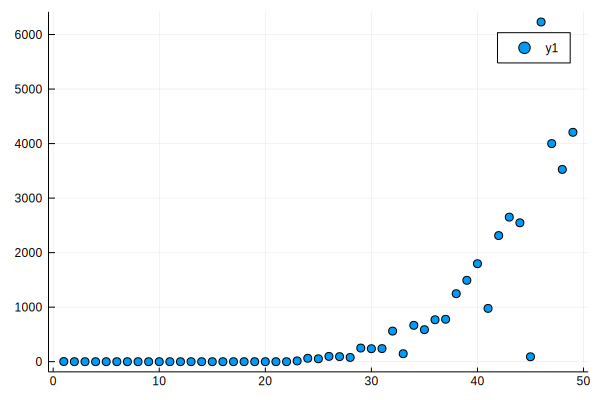

In [20]:
scatter(y[findfirst(y .> 0):end])

In [21]:
y = reverse(df.NewConfCases);
y = y[findfirst(y .> 0):end]

49-element Array{Int64,1}:
    3
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    ⋮
 1247
 1492
 1797
  977
 2313
 2651
 2547
   90
 6230
 4000
 3526
 4207

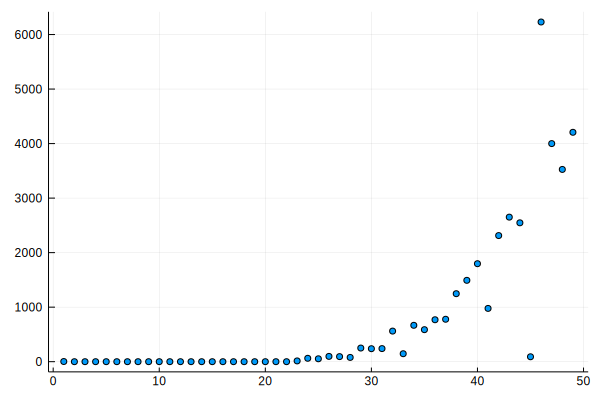

In [22]:
scatter(y, ms=3, leg=false)

## Quadrados Mínimos

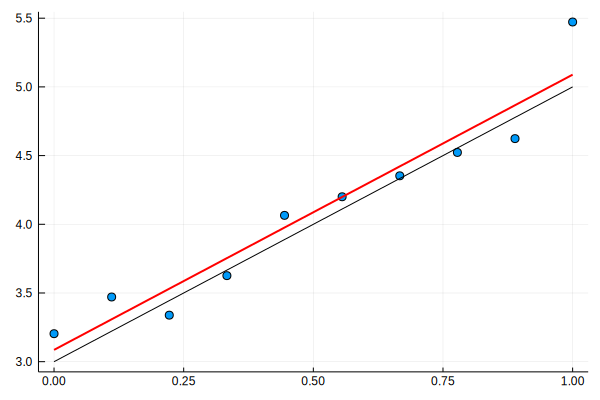

In [23]:
using Random

Random.seed!(0)
n = 10
x = range(0, 1, length=n)
y = 2x .+ 3 + randn(n) * 0.3
scatter(x, y, leg=false)
plot!(x, 2x .+ 3, c=:black)

M = [n  sum(x);  sum(x)   sum(x.^2)]
c = [sum(y);  sum(x .* y)]

β = M \ c
plot!(x, β[1] .+ β[2] * x, c=:red, lw=2)

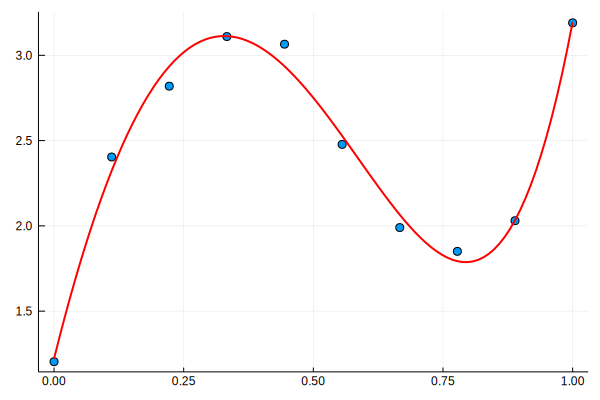

In [24]:
using Random

Random.seed!(0)
n = 10
x = range(0, 1, length=n)
y = exp.(x) + sin.(2π * x) + 4 * x .* (1 .- x) + randn(n) * 0.3
scatter(x, y, leg=false)

X = [ones(n) x x.^2 x.^3 sin.(x)]

M = X' * X
c = X' * y

β = M \ c

xg = range(minimum(x), maximum(x), length=100)
X = [ones(length(xg)) xg xg.^2 xg.^3 sin.(xg)]
plot!(xg, X * β, c=:red, lw=2)

## COVID-19

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[37]:1
└ @ Core In[37]:1


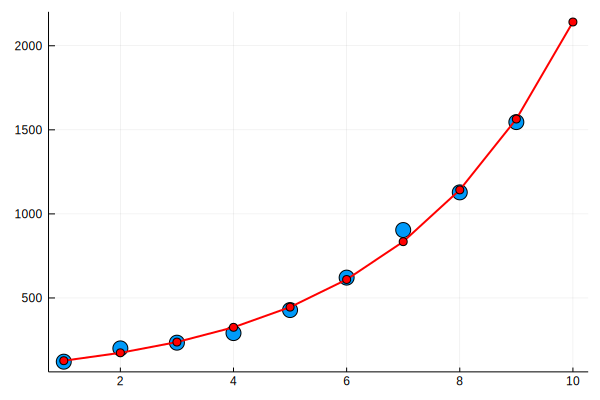

In [37]:
df = data[findall(data[:CountryExp] .== "Brazil"),:]
y = reverse(df.NewConfCases);
y = cumsum(y)
y = y[findfirst(y .>= 100):end]

# A partir de quando Δy > 0
#y = y[findlast(y .== 0)+1:end]

#y = cumsum(y[findlast(y .== 0)+1:end])
#y = cumsum(y[findfirst(y .> 0):end])

n = length(y)
x = range(1, n, length=n)

X = [ones(n)  x]
ytil = log.(y)

M = X' * X
c = X' * ytil

β = M \ c

scatter(x, y, leg=false, ms=8)

xg = range(1, n + 1, length=n+1)
#xg = range(1, n, length=n)
X = [ones(length(xg))  xg]
plot!(xg, exp.(X * β), c=:red, lw=2)
scatter!(xg, exp.(X * β), c=:red, lw=2)

## Regressão Não-Linear

In [2]:
using NLPModels, NLPModelsIpopt

┌ Info: Precompiling NLPModels [a4795742-8479-5a88-8948-cc11e1c8c1a6]
└ @ Base loading.jl:1273
┌ Info: Precompiling NLPModelsIpopt [f4238b75-b362-5c4c-b852-0801c9a21d71]
└ @ Base loading.jl:1273


In [38]:
df = data[findall(data[:CountryExp] .== "Brazil"),:]
y = reverse(df.NewConfCases);
y = cumsum(y)
y = y[findfirst(y .≥ 100):end]

#y = y[1:end-1]
# A partir de quando Δy > 0
#y = y[findlast(y .== 0)+1:end]
#y = cumsum(y[findlast(y .== 0)+1:end])

n = length(y)
x = range(1, n, length=n)
x = range(0, 1, length=n)

h(β, x) = β[3] / (1 + exp(-β[1] - β[2] * x))
nlp = ADNLPModel(
    β -> 0.5 * sum( (y[i] - h(β, x[i]))^2 for i = 1:n),
    [-5.53; 5.76; 4e4],
    uvar=[0.0; Inf; Inf]
)

output = ipopt(nlp)
print(output)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[38]:1
└ @ Core In[38]:1


This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        1
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

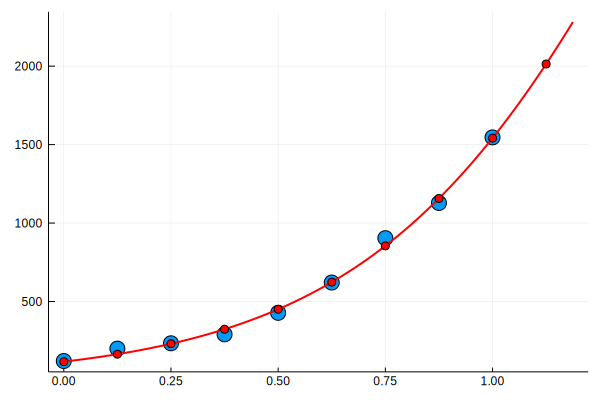

In [39]:
scatter(x, y, leg=false, ms=8)
β = output.solution

Δx = x[2] - x[1]
nnext = 1

xg = range(0, 1.0 + (nnext + 0.5) * Δx, length=100)
hx = [h(β, xi) for xi in xg]

plot!(xg, hx, c=:red, lw=2)

xnext = range(0.0, x[end] + nnext * Δx, length=n + nnext)
hnext = [h(β, xi) for xi in xnext]
scatter!(xnext, hnext, c=:red)

## Análise

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[32]:3
└ @ Core ./In[32]:3


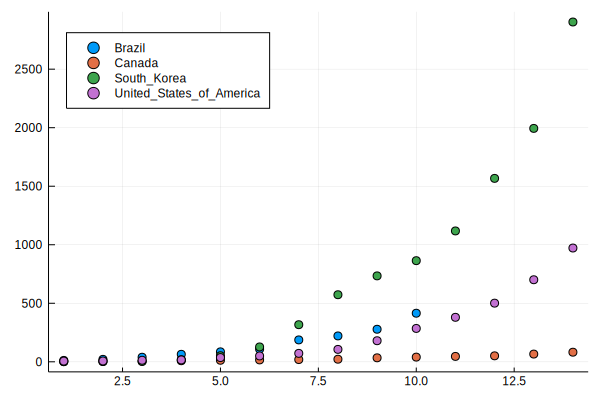

In [32]:
plot()
for c in ["Brazil", "Canada", "South_Korea", "United_States_of_America"]
    df = data[findall(data[:CountryExp] .== c),:]
    y = reverse(df.NewConfCases);
    #y = cumsum(y[findfirst(y .> 0):end])
    y = cumsum(y[findlast(y .== 0)+1:end])
    y = y[1:min(14, length(y))]

    scatter!(y, label=c)
end
plot!(legend=:topleft)